In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [60]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#date clean up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Administrator\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Jun 18 10:57:15 2024).


In [61]:
# dropping NAN values in salary_year_avg column
df["salary_hour_avg"]=df.dropna(subset=["salary_year_avg"],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22003 entries, 28 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        22003 non-null  object        
 1   job_title              22003 non-null  object        
 2   job_location           21723 non-null  object        
 3   job_via                22003 non-null  object        
 4   job_schedule_type      21987 non-null  object        
 5   job_work_from_home     22003 non-null  bool          
 6   search_location        22003 non-null  object        
 7   job_posted_date        22003 non-null  datetime64[ns]
 8   job_no_degree_mention  22003 non-null  bool          
 9   job_health_insurance   22003 non-null  bool          
 10  job_country            22003 non-null  object        
 11  salary_rate            22003 non-null  object        
 12  salary_year_avg        22003 non-null  float64       
 13  sala

In [62]:
df_grouped=df.groupby("job_title_short")["salary_year_avg"].agg(["median","min","max","count"]).sort_values(by="median",ascending=False).head(10)
df_grouped

,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155500.0,45000.0,890000.0,1690
Senior Data Engineer,147500.0,35000.0,425000.0,1591
Data Scientist,127500.0,27000.0,960000.0,5922
Data Engineer,125000.0,15000.0,525000.0,4500
Senior Data Analyst,111175.0,30000.0,425000.0,1131
Machine Learning Engineer,106415.0,30000.0,325000.0,576
Software Engineer,99150.0,28000.0,375000.0,467
Cloud Engineer,90000.0,42000.0,280000.0,65
Data Analyst,90000.0,25000.0,650000.0,5451


In [71]:
# USA
df_US_Jobs = df[df["job_country"] == "United States"]
df_US_Jobs = df_US_Jobs[df["salary_year_avg"].notna()]
df_US_Jobs= df_US_Jobs.groupby("job_title_short")["salary_year_avg"].agg(["median","min","max","count"]).sort_values(by="median",ascending=False)
df_US_Jobs

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8116\2054992078.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_US_Jobs = df_US_Jobs[df["salary_year_avg"].notna()]


,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155000.0,55000.0,475000.0,1241
Machine Learning Engineer,150000.0,44408.5,315000.0,128
Senior Data Engineer,150000.0,45000.0,375000.0,1058
Data Scientist,130000.0,30000.0,960000.0,4553
Software Engineer,130000.0,48982.0,375000.0,157
Data Engineer,125000.0,23496.0,525000.0,2915
Cloud Engineer,116100.0,42000.0,221844.0,20
Senior Data Analyst,110000.0,35360.0,425000.0,913
Business Analyst,90000.0,35000.0,387460.0,431


In [92]:
job_counts = df["job_title_short"].value_counts()
plt.bar(job_counts.index,job_counts)
plt.xticks(rotation=45,ha="right")
plt.ylabel("Job Counts")
plt.show()

job_title_short
Data Scientist               5922
Data Analyst                 5451
Data Engineer                4500
Senior Data Scientist        1690
Senior Data Engineer         1591
Senior Data Analyst          1131
Business Analyst              610
Machine Learning Engineer     576
Software Engineer             467
Cloud Engineer                 65
Name: count, dtype: int64

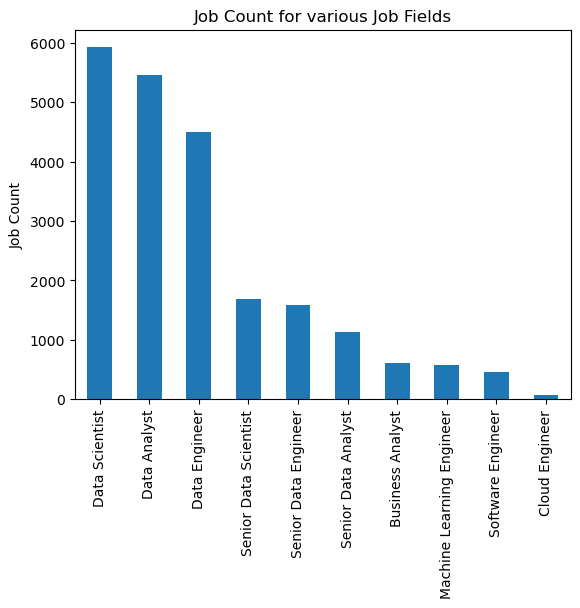

In [94]:
job_counts.plot(kind="bar")
plt.ylabel("Job Count")
plt.xlabel("")
plt.title("Job Count for various Job Fields")
plt.show()

In [110]:
df_grouped_title=df.groupby("job_title_short")["salary_year_avg"].median().sort_values()

<Axes: ylabel='job_title_short'>

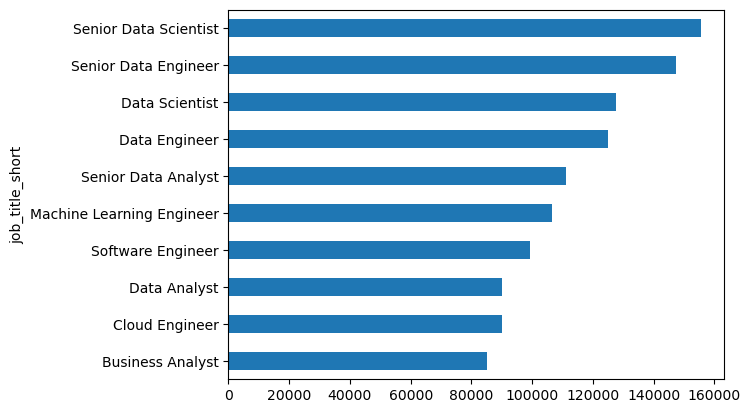

In [111]:
df_grouped_title.plot(kind="barh")